In [1]:
from vnstock import *
from function import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [13]:
ticket = ['CII','CTD','CTG','DHG','DPM','EIB','FPT','GAS','GMD','HDB','HPG','MBB','MSN','MWG','NVL','PNJ','REE','ROS','SAB','SBT','SSI','STB','TCB','VCB','VHM','VIC','VJC','VNM','VPB','VRE']

frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date='2023-02-11')    
    a["ticker"] = i
    frame.append(a)

close= pd.concat(frame).pivot_table(values="Close", columns="ticker", index="TradingDate")

### Markowitz model

In [3]:
w = marko_weights(close)

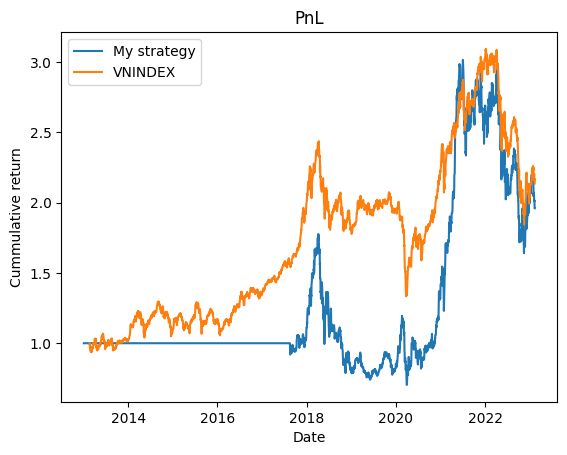

In [4]:
a = Simresult(w,returns=close.pct_change())
a.plot_pnl()

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumprod(m["indexValue"].pct_change()+1), label="VNINDEX")
plt.legend()

### Alpha = ts_delta(close,5); weights

In [14]:
lag = 5
close_t5=close-close.shift(lag)

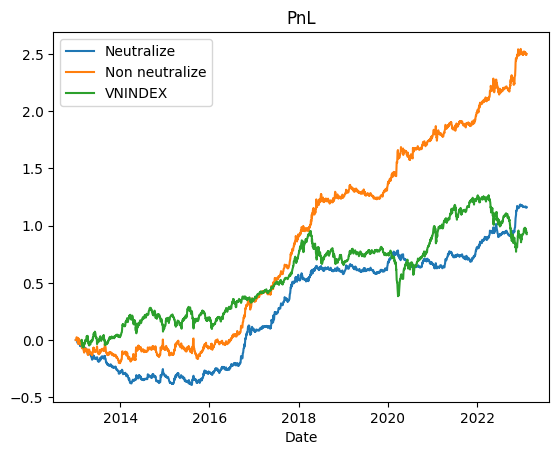

In [15]:
returns = close.pct_change()
w  = weights1(close_t5, neutrali=1)
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

w1  = weights1(close_t5, neutrali=0)
non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [10]:
neu.get_summary()

,Return,Sharpe,Turnover
TradingDate,,,
2010,-0.124467,-1.214971,0.580908
2011,0.583131,3.528917,0.526522
2012,-0.189168,-1.800933,0.604355
2013,-0.276050,-2.732908,0.639321
2014,-0.027235,-0.252777,0.603191
2015,0.025224,0.234567,0.585701
2016,0.371460,3.035229,0.581179
2017,0.463781,3.483185,0.542485
2018,0.031907,0.277685,0.577621


In [11]:
non_neu.get_summary()

,Return,Sharpe,Turnover
TradingDate,,,
2010,-0.161741,-0.901485,0.616581
2011,0.765750,3.583726,0.535513
2012,-0.061491,-0.344180,0.633512
2013,-0.131070,-0.825564,0.643758
2014,0.113767,0.667203,0.611300
2015,0.022115,0.144314,0.596954
2016,0.402133,2.803389,0.548013
2017,0.576685,4.164778,0.518273
2018,0.327371,1.617240,0.582216


### Alpha = ts_delta(close,5); weight1

In [9]:
returns = close.pct_change()
w  = weights1(close_t5)

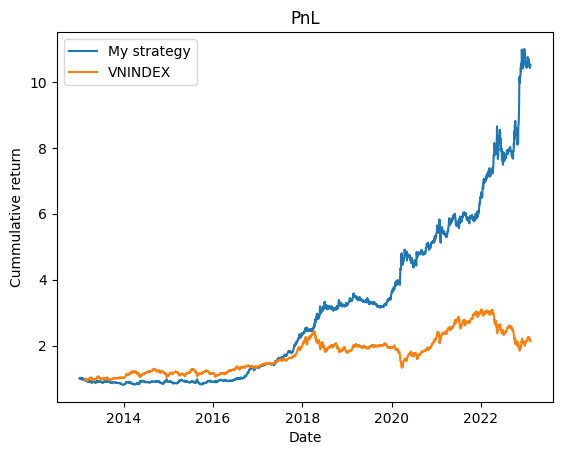

In [10]:
kq=Simresult(weights=w,returns=returns)
kq.plot_pnl()

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumprod(m["indexValue"].pct_change()+1), label="VNINDEX")
plt.legend()

In [11]:
kq.get_summary()

,Return,Sharpe,Turnover,Fitness
0,0.265213,1.540678,0.592143,1.031088


### Alpha = rank(ts_delta(close,5)); weight

In [12]:
lag = 5
close_t5=close-close.shift(lag)
ra_t5 = (close_t5.rank(axis=1).div(close_t5.rank(axis=1).sum(axis=1),axis=0))
w =weights(ra_t5)

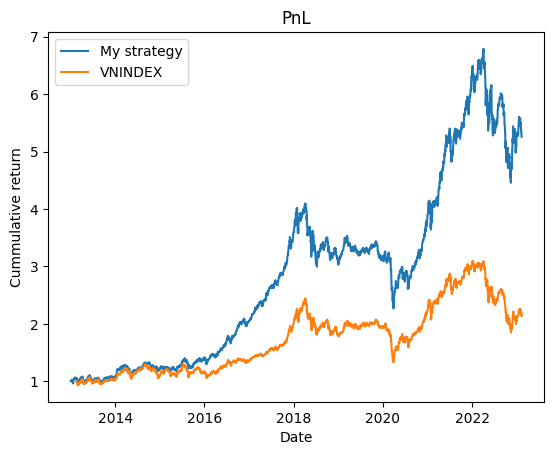

In [13]:
a = Simresult(w,returns)
a.plot_pnl()

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumprod(m["indexValue"].pct_change()+1), label="VNINDEX")
plt.legend()

In [125]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness
0,0.180427,0.981779,0.303456,0.757035


In [14]:
import yfinance as yf

In [16]:
vic = yf.download("VIC","2022-01-01","2023-01-01")

[*********************100%***********************]  1 of 1 completed


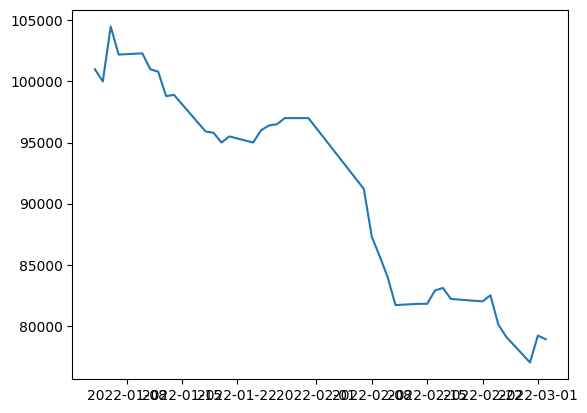

In [17]:
plt.plot(vic["Adj Close"])

In [18]:
b = stock_historical_data(symbol=i, 
                        start_date="2022-01-01", 
                        end_date='2023-01-01')

In [21]:
b["Close"]

0      31150.0
1      33300.0
2      35600.0
3      34750.0
4      35000.0
        ...   
244    24550.0
245    25800.0
246    26900.0
247    26500.0
248    26300.0
Name: Close, Length: 249, dtype: float64

In [22]:
vic["Close"]

Date
2022-01-04    101000.0
2022-01-05    100000.0
2022-01-06    104500.0
2022-01-07    102200.0
2022-01-10    102300.0
2022-01-11    101000.0
2022-01-12    100800.0
2022-01-13     98800.0
2022-01-14     98900.0
2022-01-18     95900.0
2022-01-19     95800.0
2022-01-20     95000.0
2022-01-21     95500.0
2022-01-24     95000.0
2022-01-25     96000.0
2022-01-26     96400.0
2022-01-27     96500.0
2022-01-28     97000.0
2022-01-31     97000.0
2022-02-07     91200.0
2022-02-08     87300.0
2022-02-09     85700.0
2022-02-10     84000.0
2022-02-11     81700.0
2022-02-14     81800.0
2022-02-15     81800.0
2022-02-16     82900.0
2022-02-17     83100.0
2022-02-18     82200.0
2022-02-22     82000.0
2022-02-23     82500.0
2022-02-24     80100.0
2022-02-25     79100.0
2022-02-28     77000.0
2022-03-01     79200.0
2022-03-02     78900.0
Name: Close, dtype: float64